In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

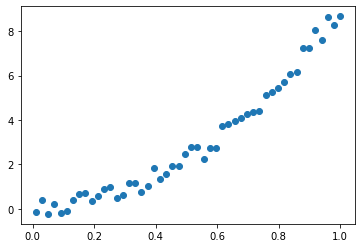

In [3]:
n = 50
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 3, n) * np.linspace(0.01, 3, n) + np.random.rand(n) - .5


plt.scatter(x,y)

## Linear Regression - no regularization

In [4]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([8.80614005]), -1.4027377339690181)

## Linear "Ridge" Regression - L2 regularization

In [5]:
ridge = linear_model.Ridge(alpha=.5)

ridge.fit(x, y)

ridge.coef_, ridge.intercept_

(array([7.87926256]), -0.9346646031781951)

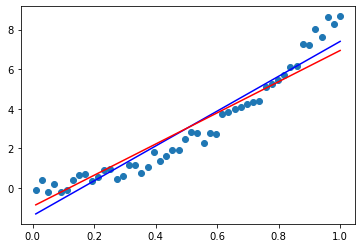

In [6]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='r')

Clearly Linear 1 degree (y = m x) don't fix very well

## Let's try $x^{15}$ polynomial!

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

x_15 = poly.fit_transform(x.reshape(-1, 1))

In [8]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00,  2.38378563e+02, -9.88078262e+03,  1.95296677e+05,
        -2.24668419e+06,  1.67424602e+07, -8.57524958e+07,  3.12401166e+08,
        -8.25264534e+08,  1.59429209e+09, -2.24950180e+09,  2.28997165e+09,
        -1.63634495e+09,  7.78272576e+08, -2.21154965e+08,  2.83998448e+07]),
 -1.6933351176169005)

In [9]:
ridge = linear_model.Ridge()

ridge.fit(x_15, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.        ,  2.36008385,  2.1023572 ,  1.62056423,  1.20155014,
         0.8728412 ,  0.61977664,  0.42395563,  0.27041775,  0.14814921,
         0.04926753, -0.03185152, -0.09925218, -0.15587976, -0.20391165,
        -0.24498329]),
 0.17038863203060117)

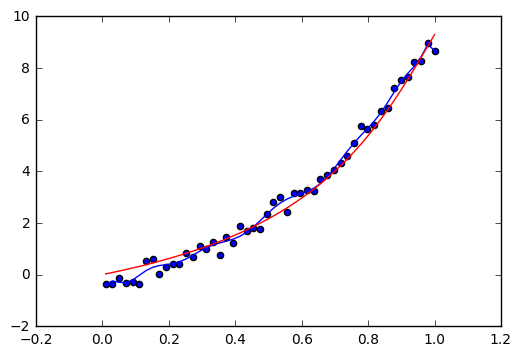

In [197]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

We can see that the non-ridge model fits points very well. But how does it fare for new points?

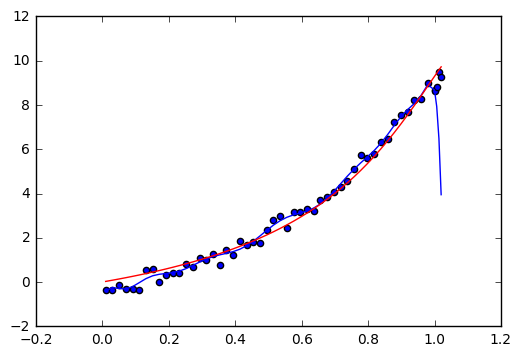

In [198]:
m = 4
x_final = 1.02
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

Clearly, the new predictions are not so great.

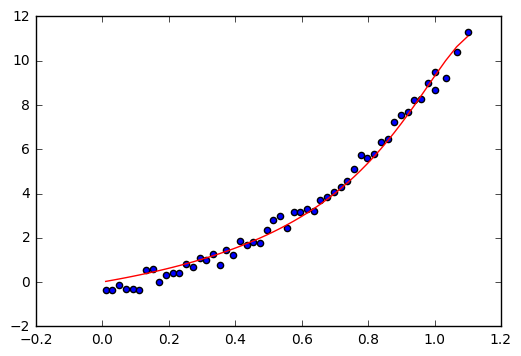

In [173]:
m = 4
x_final = 1.1
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

The Ridge model fares better for new values. 

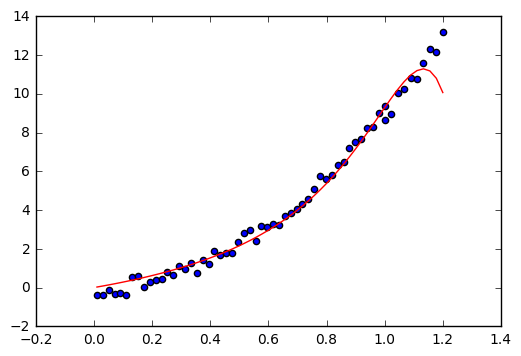

In [174]:
m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

But not all new values

## Back to $x^2$ degree model 

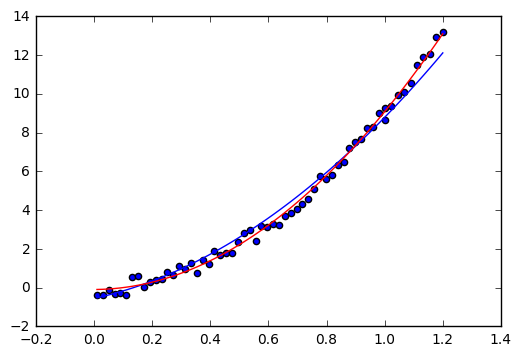

In [178]:
poly2 = PolynomialFeatures(degree=2)

m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_poly = poly2.fit_transform(x2)

y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


ridge = linear_model.Ridge()
ridge.fit(x_poly, y2)

model = linear_model.LinearRegression()
model.fit(x_poly, y2)

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_poly, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x2, np.dot(x_poly, model.coef_) + model.intercept_, c='r')